##### Introdução

Com a baseline previamente estabelecida, este trecho tem como objetivo utilizá-la como referência central para a realização de comparações e validações dos resultados obtidos ao longo do desenvolvimento. A partir dessa linha de base, será possível mensurar de forma objetiva o impacto de diferentes configurações e abordagens no desempenho do sistema, permitindo uma análise criteriosa e fundamentada no contexto da Neuro-Evolução.

**dados**
-   Os dados analisados são referentes às <a href="https://gml.noaa.gov/ccgg/trends/gl_data.html">Tendências do dióxido de carbono atmosférico</a>, cobrindo o período de 1979 à 2024.
-   As medições estão na escala de partes por milhão (ppm). Por exemplo uma concentração de 0,000400 corresponde a 400 ppm.
    -   **Mais especificamente:** a medição representa uma fração molar de CO₂ no ar seco, ou seja, o número de moléculas de dióxido de carbono dividido pelo número total de moléculas no ar (incluindo o próprio CO₂), após a remoção do vapor d’água.

**dataSet**
-   Obtido a partir do site <a href="https://gml.noaa.gov/">gml.noaa.gov</a>, que é um site oficial do governo dos Estados Unidos, cuja sigla GML e NOAA significam respectivamente, Global Monitoring Laboratory (Laboratório de Monitoramento Global) e National Oceanic and Atmospheric Administration (Administração Oceânica e Atmosférica Nacional)

# Análise de Séries temporais com Deep Learning

## Índice
- [x](#x)

## Pip Install e importação de bibliotecas

In [47]:
# pip install tensorflow pandas numpy

In [48]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn import linear_model


import aux_functions as aux
import importlib
importlib.reload(aux)

<module 'aux_functions' from 'c:\\Users\\luize\\OneDrive\\Documentos\\GitHub\\Otimizacao-de-Gas-com-Neuro-Evolucao\\Trends_Atmospheric_CO2\\aux_functions.py'>

In [49]:
full_data_set = aux.ler_csv('dataSet.csv')
df = aux.ler_csv('dataSet.csv', average_only=True)

In [50]:
df.describe().transpose()

count    552.000000
mean     374.854203
std       25.032462
min      334.360000
25%      354.007500
50%      371.675000
75%      395.082500
max      425.190000
Name: average, dtype: float64

Separação para Treino e Teste

c:\Users\luize\OneDrive\Documentos\GitHub\Otimizacao-de-Gas-com-Neuro-Evolucao\Trends_Atmospheric_CO2\aux_functions.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.show()


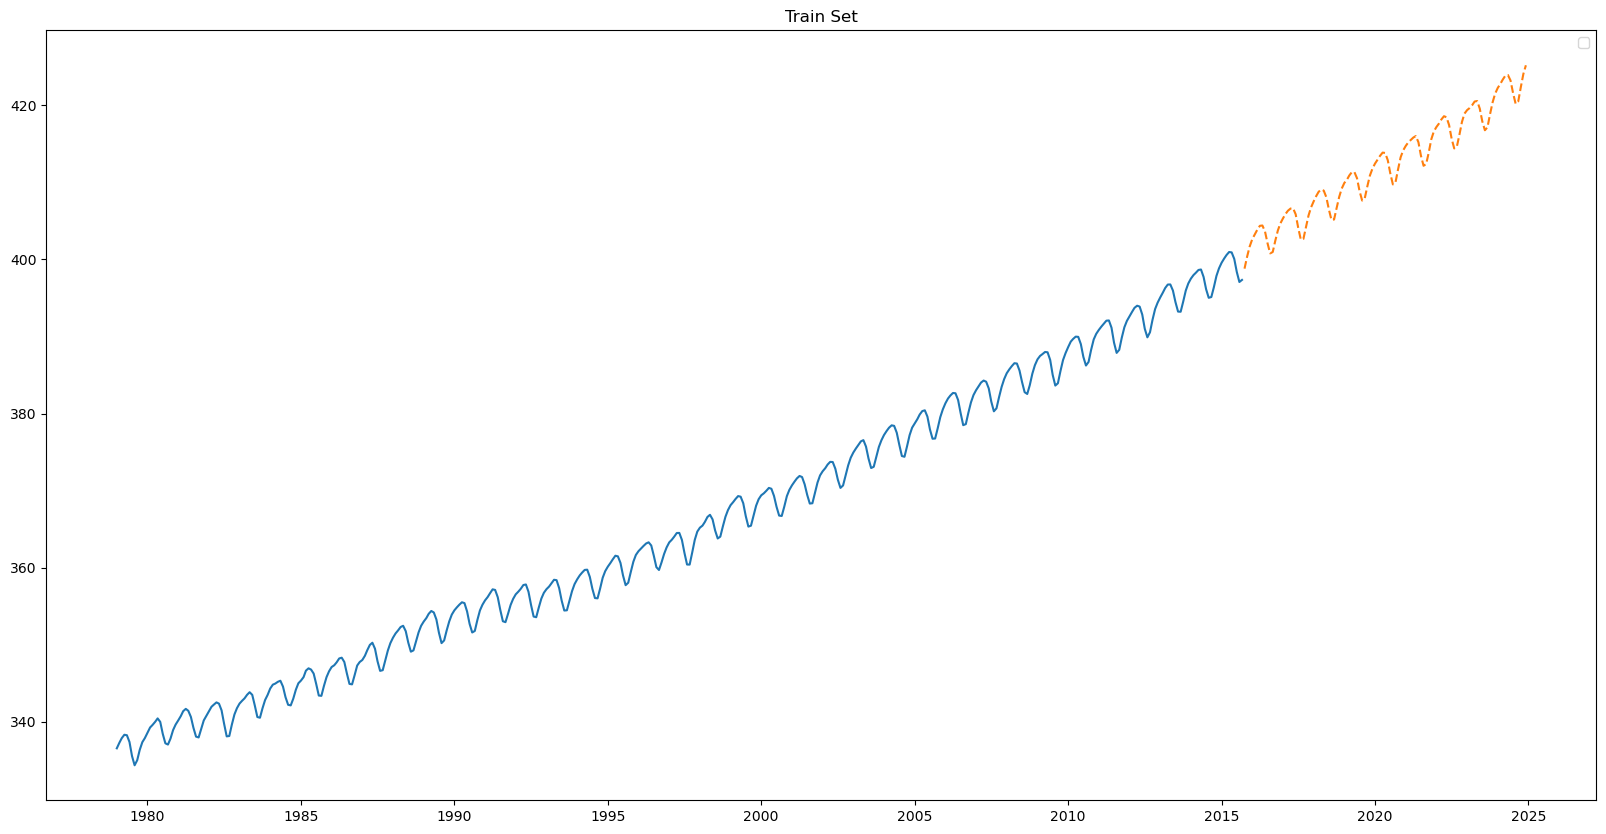

In [51]:
train_cut = 0.8

# train = df.sample(frac=train_cut, random_state=0)
# # Não utilizarei sample pois quero fazer uma previsão em cima de um conjunto fixo de dados

train = df.iloc[:int(len(df) * train_cut)]
test = df.iloc[int(len(df) * train_cut):]

aux.plotLine(train, compare=test, title='Train Set')

c:\Users\luize\OneDrive\Documentos\GitHub\Otimizacao-de-Gas-com-Neuro-Evolucao\Trends_Atmospheric_CO2\aux_functions.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.show()


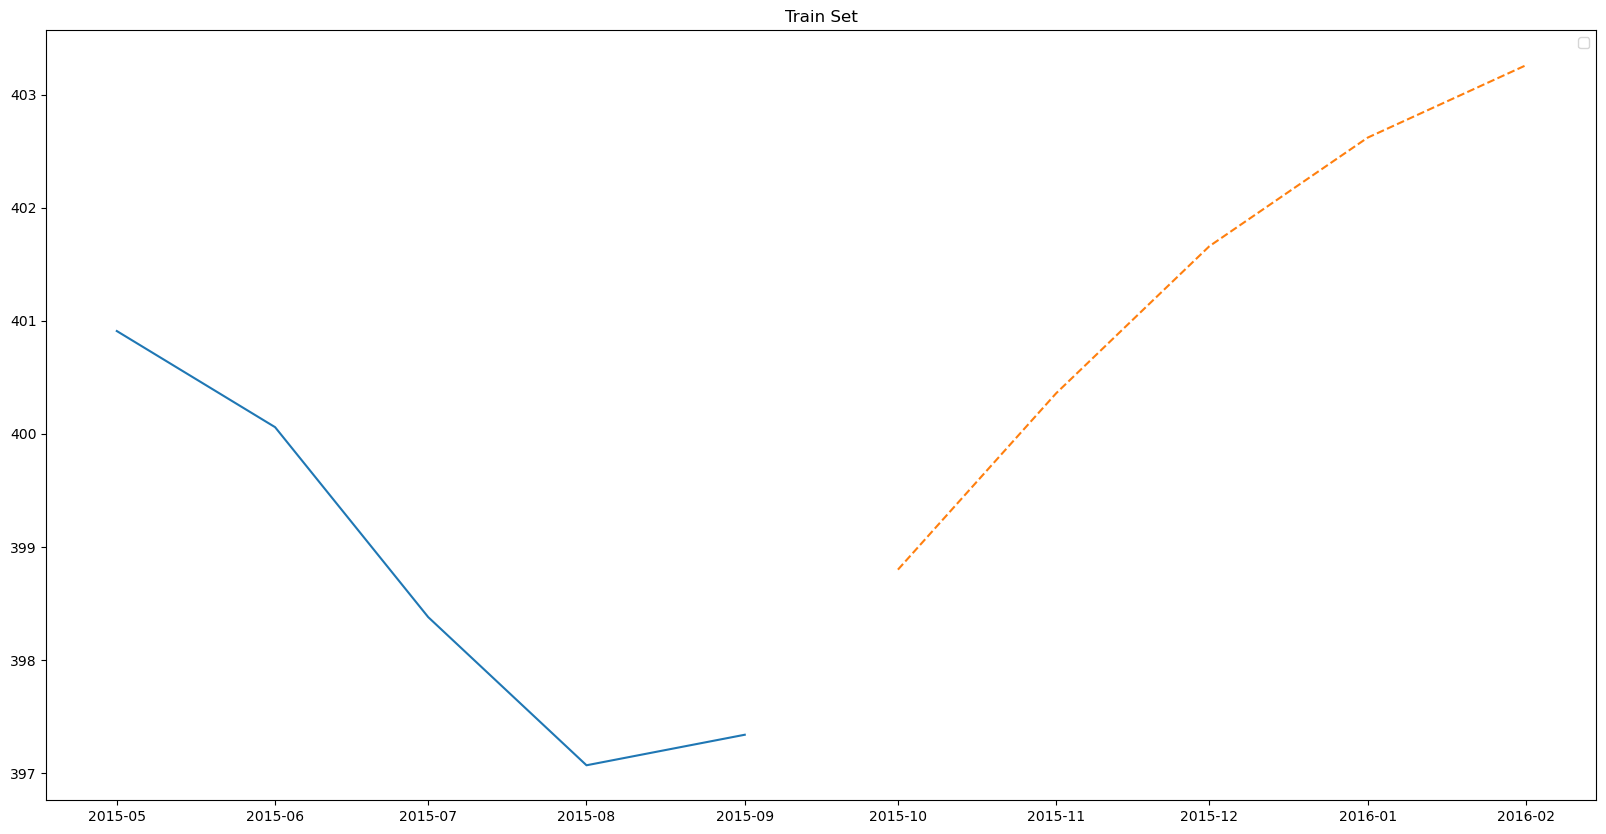

data
1979-01-01    336.56
1979-02-01    337.29
1979-03-01    337.88
1979-04-01    338.32
1979-05-01    338.26
               ...  
2015-05-01    400.91
2015-06-01    400.06
2015-07-01    398.38
2015-08-01    397.07
2015-09-01    397.34
Name: average, Length: 441, dtype: float64
data
2015-10-01    398.80
2015-11-01    400.36
2015-12-01    401.66
2016-01-01    402.62
2016-02-01    403.26
               ...  
2024-08-01    420.19
2024-09-01    420.50
2024-10-01    422.32
2024-11-01    424.07
2024-12-01    425.19
Name: average, Length: 111, dtype: float64


In [58]:
aux.plotLine(train.iloc[len(train)-5:], compare=test.iloc[:5], title='Train Set')
print(train)
print(test)